Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

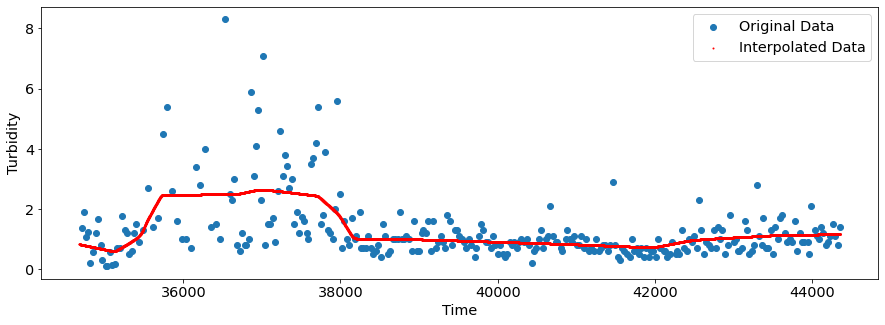

313/313 [==============================] - 0s 369us/step - loss: 8.4495e-17
['loss']


In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Turbidity/saved_model/my_modelBB09_Turbidity')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/Turbidity_data/BB09.csv")
time = df['time'].values
turbidity = df['turbidity'].values
df

#Transform the normalized scale to real scale
turbidity_min = 0.1
turbidity_max = 8.3
time_min = 34708.00                
time_max = 44354.43                         

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(turbidity_max - turbidity_min) + turbidity_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, turbidity*(turbidity_max - turbidity_min) + turbidity_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [4]:
interpolation = model.predict([0.078681953
,0.084798205
,0.091121788
,0.097445371
,0.103768953
,0.110092536
,0.116519784
,0.122636035
,0.128959618
,0.138496825
,0.141606783
,0.147930366
,0.154357614
,0.160473866
,0.166797448
,0.173121031
,0.179444613
,0.185768196
,0.192195444
])
interpolation

array([[0.13533275],
       [0.17443177],
       [0.21216649],
       [0.24716453],
       [0.2808479 ],
       [0.28869683],
       [0.28903297],
       [0.28935283],
       [0.28968352],
       [0.2901823 ],
       [0.2903449 ],
       [0.29067564],
       [0.2910117 ],
       [0.2913316 ],
       [0.29166228],
       [0.29199296],
       [0.29232758],
       [0.29268378],
       [0.29304576]], dtype=float32)